In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
a=datasets.load_iris()

In [10]:
a

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [12]:
df=pd.DataFrame(a["data"],columns=["sepal length","sepal width","petal length","petal width"])

In [13]:
df

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
target=pd.DataFrame(a["target"],columns=["target"])

In [18]:
target

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [15]:
X=df
Y=target

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [17]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit(X_test)

In [19]:
model=Sequential()
model.add(Dense(10,activation="sigmoid",input_dim=4))
model.add(Dense(3,activation="softmax"))

/home/appsmartz/miniconda3/envs/rpa/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-20 18:34:34.493616: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83 (332.00 B)

 Trainable params: 83 (332.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(loss="sparse_categorical_crossentropy",metrics=["accuracy"],optimizer="Adam")

In [30]:
history=model.fit(X_train_scaled,Y_train,validation_split=0.2,epochs=100)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7682 - loss: 0.8547 - val_accuracy: 0.7083 - val_loss: 0.8699
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7799 - loss: 0.8484 - val_accuracy: 0.7083 - val_loss: 0.8648
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8073 - loss: 0.8283 - val_accuracy: 0.7083 - val_loss: 0.8595
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7526 - loss: 0.8527 - val_accuracy: 0.7083 - val_loss: 0.8544
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7799 - loss: 0.8298 - val_accuracy: 0.7083 - val_loss: 0.8492
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7799 - loss: 0.8286 - val_accuracy: 0.7083 - val_loss: 0.8442
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7682 - loss: 0.8281 - val_accuracy: 0.7083 - val_loss: 0.8391
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7773 - loss: 0.8249 - val_accuracy: 0.7083 - val_loss:

In [31]:
history.history

{'accuracy': [0.7708333134651184,
  0.7708333134651184,
  0.7708333134651184,
  0.7708333134651184,
  0.7708333134651184,
  0.7708333134651184,
  0.7708333134651184,
  0.78125,
  0.78125,
  0.78125,
  0.78125,
  0.7708333134651184,
  0.7708333134651184,
  0.78125,
  0.7708333134651184,
  0.7708333134651184,
  0.7708333134651184,
  0.78125,
  0.78125,
  0.78125,
  0.7916666865348816,
  0.7916666865348816,
  0.7916666865348816,
  0.7916666865348816,
  0.7916666865348816,
  0.7916666865348816,
  0.7916666865348816,
  0.7916666865348816,
  0.7916666865348816,
  0.7916666865348816,
  0.7916666865348816,
  0.7916666865348816,
  0.7916666865348816,
  0.7916666865348816,
  0.7916666865348816,
  0.7916666865348816,
  0.7916666865348816,
  0.7916666865348816,
  0.7916666865348816,
  0.7916666865348816,
  0.7916666865348816,
  0.7916666865348816,
  0.7916666865348816,
  0.7916666865348816,
  0.7916666865348816,
  0.7916666865348816,
  0.7916666865348816,
  0.7916666865348816,
  0.78125,
  0.79166

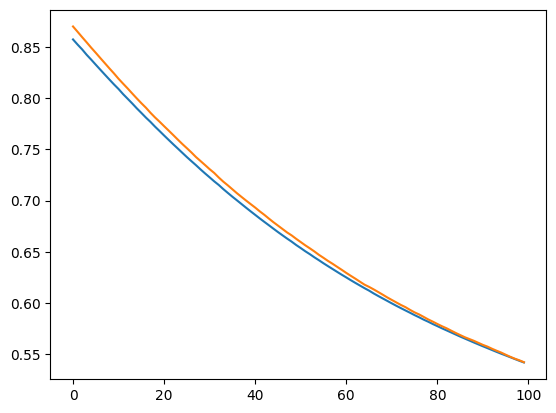

In [32]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

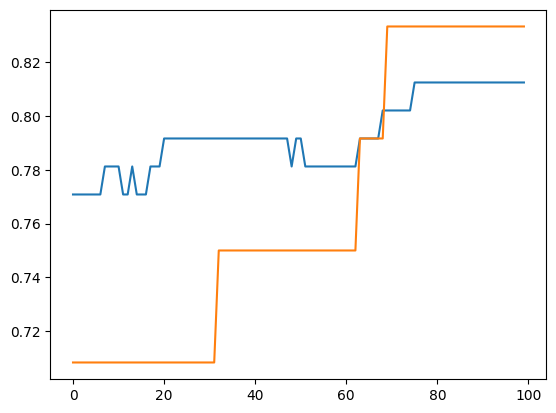

In [33]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

In [39]:
Y_pre=model.predict(X_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [40]:
predicted_labels = np.argmax(Y_pre, axis=1)

In [37]:
X_test_scaled=scaler.transform(X_test)

In [41]:
predicted_labels

array([2, 0, 1, 2, 1, 2, 0, 2, 2, 0, 2, 1, 2, 2, 1, 0, 0, 2, 2, 1, 2, 0,
       1, 0, 2, 1, 0, 2, 2, 0])

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,predicted_labels)

0.9333333333333333